# 이미지 데이터 셋을 이용한 CNN Modeling
## Dataset Categorical Classification
* Train_Data : 
* Valid_Data : 
* Test_Data :

In [ ]:
import warnings
warnings.filterwarnings('ignore')

* Import TensorFlow

In [ ]:
import tensorflow as tf

tf.__version__

'2.11.0'

# I. Data Preprocessing

> ## 1) Unzip 'posture_image.zip'

In [ ]:
!unzip -q /content/posture_image.zip

* 학습 데이터 확인

In [ ]:
!ls -l

> ## 2) Image_File Directory Setting

In [ ]:
train_dir = 'train'
valid_dir = 'validation'
# test_dir  = 'test'

> ## 3) ImageDataGenerator( ) & flow_from_directory( )

* Normalization
 * ImageDataGenerator( )
* Resizing & Generator
 * flow_from_directory( )

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   fill_mode = 'nearest')

valid_datagen = ImageDataGenerator(rescale = 1./255)


train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

valid_generator = valid_datagen.flow_from_directory(
                  valid_dir,
                  target_size = (150, 150),
                  batch_size = 20,
                  class_mode = 'categorical')

Found 6315 images belonging to 3 classes.
Found 2717 images belonging to 3 classes.


> ## 4) Test train_generator

In [ ]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 150, 150, 3)
배치 레이블 크기: (20, 3)


In [ ]:
labels_batch

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

# II. Import VGG-16 Model

> ## 1) conv_base

In [ ]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights = 'imagenet',
                  include_top = False,
                  input_shape = (150, 150, 3))

58889256/58889256 [==============================] - 1s 0us/step


# IV. Keras CNN Modeling with VGG-16

> ## 1) Model Define

* 'conv_base' & 'Classification' Network
* Dropout Layer

In [ ]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(conv_base)

model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 512)               4194816   
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 18,911,043
Trainable params: 18,911,043
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정
 * 이미 학습된 Weight 값을 Tuning
 * 매우 작은 Learnig Rate 지정
 * optimizers.Adam(lr = 0.000005)

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.legacy.Adam(learning_rate = 0.000005),
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 30분

In [ ]:
%%time

Hist_posture = model.fit(train_generator,
                        steps_per_epoch = 30,
                        epochs = 20,
                        validation_data = valid_generator,
                        validation_steps = 30)

Epoch 1/20
30/30 [==============================] - 19s 228ms/step - loss: 0.6240 - accuracy: 0.4717 - val_loss: 0.4921 - val_accuracy: 0.6800
Epoch 2/20
30/30 [==============================] - 7s 240ms/step - loss: 0.5181 - accuracy: 0.6083 - val_loss: 0.3574 - val_accuracy: 0.8250
Epoch 3/20
30/30 [==============================] - 8s 273ms/step - loss: 0.4468 - accuracy: 0.7133 - val_loss: 0.2500 - val_accuracy: 0.8817
Epoch 4/20
30/30 [==============================] - 10s 339ms/step - loss: 0.3551 - accuracy: 0.8118 - val_loss: 0.1967 - val_accuracy: 0.8933
Epoch 5/20
30/30 [==============================] - 8s 255ms/step - loss: 0.3003 - accuracy: 0.8150 - val_loss: 0.1337 - val_accuracy: 0.9367
Epoch 6/20
30/30 [==============================] - 7s 247ms/step - loss: 0.2466 - accuracy: 0.8733 - val_loss: 0.1485 - val_accuracy: 0.9033
Epoch 7/20
30/30 [==============================] - 8s 262ms/step - loss: 0.1791 - accuracy: 0.9183 - val_loss: 0.0972 - val_accuracy: 0.9483
Epoc

> ## 4) 학습 결과 시각화

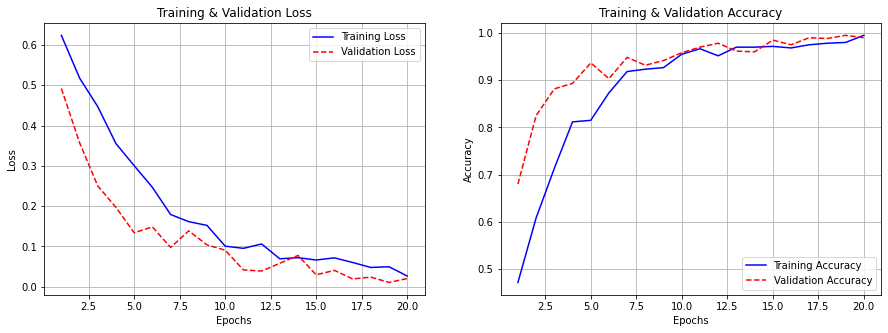

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_posture.history['loss']) + 1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, Hist_posture.history['loss'], 'b-')
plt.plot(epochs, Hist_posture.history['val_loss'], 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, Hist_posture.history['accuracy'], 'b-')
plt.plot(epochs, Hist_posture.history['val_accuracy'], 'r--')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.grid()

plt.show()

> ## 6) Model Download

In [ ]:
model.save("posture_2.h5")

In [ ]:
from google.colab import files
files.download('posture_2.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

> ## Model Evaluate

* test_generator

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'categorical')

Found 1433 images belonging to 3 classes.


* Loss & Accuracy

In [ ]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 3, 
                                verbose = 0)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

Loss = 0.32456
Accuracy = 0.88333


# 
# 
# 
# The End
# 
# 
# 